
# Using CNN's with the Cats vs Dogs Kaggle Dataset

Let's get started!

In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

Download the dataset from its original source by running the cell below. 

Note that the `zip` file that contains the images is unzipped under the `/tmp` directory.

In [ ]:
# If the URL doesn't work, visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL to the dataset

# Note: This is a very large dataset and will take some time to download

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2022-02-17 08:15:49--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.80.224.107, 2a02:26f0:3500:783::e59, 2a02:26f0:3500:78a::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.80.224.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   148MB/s    in 5.2s    

2022-02-17 08:15:54 (150 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



Now the images are stored within the `/tmp/PetImages` directory. There is a subdirectory for each class, so one for dogs and one for cats.

In [ ]:
source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12501 images of dogs.
There are 12501 images of cats.


**Expected Output:**

```
There are 12501 images of dogs.
There are 12501 images of cats.
```

I will need a directory for cats-v-dogs, and subdirectories for training
and testing. These in turn will need subdirectories for 'cats' and 'dogs'. To accomplish this, let's create the `create_train_test_dirs` function below:

In [ ]:

root_dir = '/tmp/cats-v-dogs'


if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_test_dirs(root_path):
  new_training = os.path.join(root_path, 'training')
  os.makedirs(new_training)
  os.makedirs(os.path.join(new_training, 'cats'))
  os.makedirs(os.path.join(new_training, 'dogs'))
  new_testing = os.path.join(root_path, 'testing')
  os.makedirs(os.path.join(new_testing, 'cats'))
  os.makedirs(os.path.join(new_testing, 'dogs'))

  
try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs/testing
/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/testing/dogs
/tmp/cats-v-dogs/testing/cats
/tmp/cats-v-dogs/training/dogs
/tmp/cats-v-dogs/training/cats


The `split_data` function which takes in the following arguments:
- SOURCE: directory containing the files

- TRAINING: directory that a portion of the files will be copied to (will be used for training)
- TESTING: directory that a portion of the files will be copied to (will be used for testing)
- SPLIT SIZE: to determine the portion

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  files = os.listdir(SOURCE)
  files = random.sample(files, len(files))

  for count, file in enumerate(files):
    if count < SPLIT_SIZE*len(files):
      if os.path.getsize(f"{SOURCE}/{file}")==0:
        print(f"{file} is zero length, so ignoring.")
      else:
        copyfile(f"{SOURCE}/{file}", f"{TRAINING}/{file}")
    elif os.path.getsize(f"{SOURCE}/{file}")==0:
      print(f"{file} is zero length, so ignoring.")
    else:
      copyfile(f"{SOURCE}/{file}", f"{TESTING}/{file}")



In [ ]:
# Testing split_data function

# Define paths
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
TESTING_DIR = "/tmp/cats-v-dogs/testing/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
TESTING_CATS_DIR = os.path.join(TESTING_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
TESTING_DOGS_DIR = os.path.join(TESTING_DIR, "dogs/")


if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_CATS_DIR)) > 0:
  for file in os.scandir(TESTING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_DOGS_DIR)) > 0:
  for file in os.scandir(TESTING_DOGS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(TESTING_CATS_DIR))} images of cats for testing")
print(f"There are {len(os.listdir(TESTING_DOGS_DIR))} images of dogs for testing")

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


There are 11250 images of cats for training
There are 11250 images of dogs for training
There are 1250 images of cats for testing
There are 1250 images of dogs for testing


**Expected Output:**

```
666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.
```

```
There are 11250 images of cats for training
There are 11250 images of dogs for training
There are 1250 images of cats for testing
There are 1250 images of dogs for testing
```

Now that you have successfully organized the data in a way that can be easily fed to Keras' `ImageDataGenerator`, it is time for you to code the generators that will yield batches of images, both for training and validation. For this, complete the `train_val_generators` function below.

Something important to note is that the images in this dataset come in a variety of resolutions. Luckily, the `flow_from_directory` method allows you to standarize this by defining a tuple called `target_size` that will be used to convert each image to this target resolution. **For this exercise, use a `target_size` of (150, 150)**.

**Note:** So far, you have seen the term `testing` being used a lot for referring to a subset of images within the dataset. In this exercise, all of the `testing` data is actually being used as `validation` data. This is not very important within the context of the task at hand but it is worth mentioning to avoid confusion.

In [ ]:
def train_val_generators(TRAIN_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class 
  train_datagen = ImageDataGenerator( rescale = 1.0/255. )
 

  # Passing arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAIN_DIR,
                                                      batch_size=100,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class
  validation_datagen = ImageDataGenerator( rescale = 1.0/255. )

  # Passing arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=100,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  return train_generator, validation_generator


In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


**Expected Output:**

```
Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
```


One last step before training is to define the architecture of the model that will be trained.

Complete the `create_model` function below which should return a Keras' `Sequential` model.

Aside from defining the architecture of the model, you should also compile it so make sure to use a `loss` function that is compatible with the `class_mode` you defined in the previous exercise, which should also be compatible with the output of your network. You can tell if they aren't compatible if you get an error during training.

**Note that you should use at least 3 convolution layers to achieve the desired performance.**

In [ ]:

def create_model():

  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(150, 150, 3)),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                      tf.keras.layers.MaxPooling2D(2,2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512,activation='relu'),
                                      tf.keras.layers.Dense(1,activation = 'sigmoid')
  ])

  
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy']) 

  return model


Now it is time to train your model!

**Note:** You can ignore the `UserWarning: Possibly corrupt EXIF data.` warnings.

In [ ]:
model = create_model()

history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
 77/225 [=========>....................] - ETA: 52s - loss: 0.6492 - accuracy: 0.6035

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

225/225 [==============================] - 93s 401ms/step - loss: 0.5856 - accuracy: 0.6771 - val_loss: 0.5107 - val_accuracy: 0.7548
Epoch 2/15
225/225 [==============================] - 88s 389ms/step - loss: 0.4601 - accuracy: 0.7786 - val_loss: 0.4130 - val_accuracy: 0.8136
Epoch 3/15
225/225 [==============================] - 88s 389ms/step - loss: 0.3791 - accuracy: 0.8310 - val_loss: 0.3568 - val_accuracy: 0.8464
Epoch 4/15
225/225 [==============================] - 87s 386ms/step - loss: 0.3176 - accuracy: 0.8620 - val_loss: 0.3501 - val_accuracy: 0.8484
Epoch 5/15
225/225 [==============================] - 87s 388ms/step - loss: 0.2629 - accuracy: 0.8880 - val_loss: 0.3135 - val_accuracy: 0.8668
Epoch 6/15
225/225 [==============================] - 88s 391ms/step - loss: 0.2069 - accuracy: 0.9147 - val_loss: 0.3262 - val_accuracy: 0.8736
Epoch 7/15
225/225 [==============================] - 88s 391ms/step - loss: 0.1581 - accuracy: 0.9362 - val_loss: 0.3097 - val_accuracy: 0.8

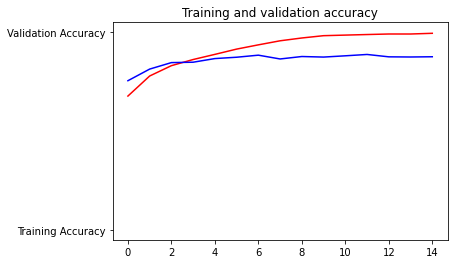

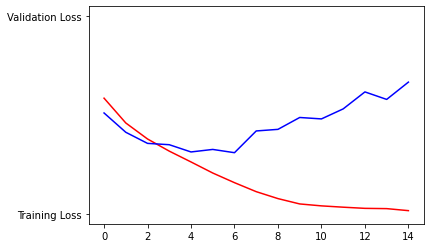

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()